In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from functools import reduce
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Signal data

In [3]:
signal_fold_1 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/2023 휴먼이해 공모전/데이터/KFold/Subset1.csv')
signal_fold_2 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/2023 휴먼이해 공모전/데이터/KFold/Subset2.csv')
signal_fold_3 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/2023 휴먼이해 공모전/데이터/KFold/Subset3.csv')
signal_fold_4 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/2023 휴먼이해 공모전/데이터/KFold/Subset4.csv')
signal_fold_5 = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/2023 휴먼이해 공모전/데이터/KFold/Subset5.csv')

signal_fold = [signal_fold_1, signal_fold_2, signal_fold_3, signal_fold_4, signal_fold_5]

columns = ['IBI_mean', 'IBI_count', 'IBI_std', 'IBI_range', 'IBI_difference',
           'EDA_mean', 'EDA_count', 'EDA_std', 'EDA_range', 'EDA_difference',
           'TEMP_mean', 'TEMP_count', 'TEMP_std', 'TEMP_range', 'TEMP_difference']

new_columns = {'IBI_mean':0,'IBI_count':1,'IBI_std':2,'IBI_range':3,'IBI_difference':4,\
               'EDA_mean':5,'EDA_count':6,'EDA_std':7,'EDA_range':8,'EDA_difference':9,\
               'TEMP_mean':10,'TEMP_count':11,'TEMP_std':12,'TEMP_range':13,'TEMP_difference':14}

for i in range(5):
  signal_fold[i] = signal_fold[i][columns]

signal_df = []

for i in range(5):
  signal_train_df_list = signal_fold[0:i] + signal_fold[i+1:5] # [1,2,3,4], [0,2,3,4], ...
  signal_train_df = reduce(lambda x, y: pd.concat([x, y], axis=0), signal_train_df_list)
  signal_train_df = signal_train_df.rename(columns=new_columns)
  signal_val_df = signal_fold[i]
  signal_val_df = signal_val_df.rename(columns=new_columns)
  signal_df.append((signal_train_df, signal_val_df))

In [4]:

signal_df[0][0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.825000,12.0,0.036824,0.104000,0.020000,0.693663,40.0,0.007313,0.026891,-0.019209,29.942000,40.0,0.013436,0.04,0.00
1,0.712000,6.0,0.019596,0.056000,-0.032000,0.658473,18.0,0.003271,0.012806,-0.008964,29.930000,18.0,0.013720,0.04,0.00
2,0.768000,6.0,0.021317,0.056000,-0.052000,0.750895,17.0,0.007866,0.023051,-0.019208,29.933529,17.0,0.017657,0.04,0.00
3,0.713143,7.0,0.034232,0.084000,-0.084000,0.665302,18.0,0.004277,0.015367,-0.003842,29.884444,18.0,0.015038,0.04,-0.02
4,0.588000,2.0,0.005657,0.008000,-0.008000,0.929311,4.0,0.001611,0.003840,0.000000,30.050000,4.0,0.000000,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,0.801339,7.0,0.032167,0.093750,-0.046875,1.032099,22.0,0.080508,0.262673,-0.262673,35.053636,22.0,0.007895,0.02,-0.02
3055,0.760417,3.0,0.018042,0.031250,0.031250,0.908415,10.0,0.013668,0.042284,-0.042284,35.066000,10.0,0.008433,0.02,0.02
3056,0.789931,9.0,0.036736,0.109375,-0.062500,0.851140,27.0,0.017790,0.057660,-0.055097,35.055926,27.0,0.009306,0.02,0.00
3057,0.755208,3.0,0.009021,0.015625,0.015625,0.816311,11.0,0.009343,0.030752,-0.030752,35.068182,11.0,0.006030,0.02,0.02


### Loading NLP Pkl

In [5]:
n = pd.read_pickle(f'/content/drive/MyDrive/Colab Notebooks/2023 휴먼이해 공모전/validation/smoteX_kcbert/kcbert_subset1_hidden_train.pkl')
n

,Emotion_x,hidden_value
0,fear,"[0.66588765, 0.059875343, 0.36526656, 0.091658..."
1,fear,"[-0.02697864, -0.02268002, -0.43062872, 0.0736..."
2,fear,"[0.90329075, -0.034409307, -0.0054969154, -1.1..."
3,fear,"[-0.17887391, -0.053396683, -0.2143668, -0.798..."
4,fear,"[0.66604245, 0.08113134, 0.32819727, -1.353594..."
...,...,...
12233,neutral,"[0.6090886, -0.08153918, -0.44831562, -0.83927..."
12234,neutral,"[0.6439695, -0.13542044, -0.062364276, -0.9302..."
12235,neutral,"[-0.022535032, -0.058643814, 0.03829825, -0.82..."
12236,neutral,"[0.016424563, -0.06475682, 0.31719697, -0.8676..."


In [6]:
nlp_df = []

for i in range(5):
  nlp_train = pd.read_pickle(f'/content/drive/MyDrive/Colab Notebooks/2023 휴먼이해 공모전/validation/smoteX_kcbert/kcbert_subset{i+1}_hidden_train.pkl')
  nlp_test = pd.read_pickle(f'/content/drive/MyDrive/Colab Notebooks/2023 휴먼이해 공모전/validation/smoteX_kcbert/kcbert_subset{i+1}_hidden_test.pkl')

  for idx, row in nlp_train.iterrows():
    if idx == 0:
      nlp_feature_array_train = nlp_train.loc[idx, 'hidden_value']
    else:
      new_array_train = nlp_train.loc[idx, 'hidden_value']
      nlp_feature_array_train = np.vstack([nlp_feature_array_train, new_array_train])
  nlp_train_df = pd.DataFrame(nlp_feature_array_train)

  for idx, row in nlp_test.iterrows():
    if idx == 0:
      nlp_feature_array_test = nlp_test.loc[idx, 'hidden_value']
    else:
      new_array_test = nlp_test.loc[idx, 'hidden_value']
      nlp_feature_array_test = np.vstack([nlp_feature_array_test, new_array_test])
  nlp_test_df = pd.DataFrame(nlp_feature_array_test)

  nlp_df.append((nlp_train_df, nlp_test_df))

In [7]:
nlp_df[0][0]

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.665888,0.059875,0.365267,0.091659,0.054527,-0.112028,0.103356,0.219565,-0.369977,-0.169170,...,-0.138937,0.053902,-0.009520,-0.016442,-2.668524,-0.406840,0.061649,0.189044,3.157189,-0.117466
1,-0.026979,-0.022680,-0.430629,0.073663,-0.892298,0.003746,1.532369,0.172114,0.021441,-0.077130,...,0.071624,0.255126,0.039635,0.104987,0.194797,0.047916,-0.023452,0.057669,0.133203,-0.079154
2,0.903291,-0.034409,-0.005497,-1.158940,0.035103,-0.121184,1.676334,-0.315759,-0.237021,0.013877,...,-0.233928,0.004925,0.107557,-0.188765,-2.941443,0.229807,0.442179,0.677518,3.845770,-0.030647
3,-0.178874,-0.053397,-0.214367,-0.798736,-0.013705,-1.013613,0.035704,-0.128169,-0.024925,0.027153,...,-0.289539,0.006430,0.125240,-0.272950,0.212002,-0.502098,-0.051426,-0.238371,0.007930,-0.036695
4,0.666042,0.081131,0.328197,-1.353595,-0.624732,-0.044929,-0.027000,-0.057821,-0.606946,-0.011263,...,-0.465096,0.029197,-0.037243,-0.455651,0.328176,-0.384324,-0.363541,-0.212733,3.647944,-0.004544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,0.609089,-0.081539,-0.448316,-0.839274,0.277923,-0.116259,1.756554,-0.170522,-0.031273,-0.581437,...,-0.068752,0.131572,0.125984,-0.358999,-2.779943,0.034412,-0.057846,0.427776,2.913963,-0.273942
12234,0.643969,-0.135420,-0.062364,-0.930265,-0.791799,-0.211092,1.654503,0.210471,-0.288042,0.215167,...,-0.574845,-0.025325,0.340487,-0.247644,-2.652617,0.165652,-0.104124,0.819078,3.641175,-0.177829
12235,-0.022535,-0.058644,0.038298,-0.829437,-0.844119,-1.670498,0.089424,0.038139,0.174640,0.284650,...,-0.315380,0.133517,-0.012499,0.008490,0.029089,0.209251,0.392424,-0.173775,0.051419,-0.072778
12236,0.016425,-0.064757,0.317197,-0.867604,-0.482434,-1.194604,0.140324,-0.230936,0.057450,-0.000947,...,-0.187597,0.226447,0.144593,-0.125163,-2.519091,0.096442,-0.000867,-0.149871,3.468369,0.028506


### Loading Wav Pkl

In [8]:
n = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/2023 휴먼이해 공모전/데이터/wav/early/train1.pkl')
n

,Emotion,path,feature
0,fear,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,"[-0.15763044, -0.6077422, 0.9321492, -0.496372..."
1,fear,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,"[0.043402143, -0.048951533, -0.5547086, -0.771..."
2,fear,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,"[-0.8018392, -0.5513309, -0.19726424, -0.37836..."
3,fear,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,"[-0.19970647, -0.9409357, -0.6534477, 0.131388..."
4,fear,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,"[0.013466638, -0.5714191, -0.8329297, -0.58263..."
...,...,...,...
12233,neutral,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,"[-0.1270239, 0.26267356, 0.29411417, -0.741985..."
12234,neutral,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,"[-0.721414, 0.08623552, -0.47613928, -0.463703..."
12235,neutral,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,"[0.088298395, -0.18266442, 0.3339269, -0.56567..."
12236,neutral,/content/drive/MyDrive/Colab Notebooks/2023 휴먼...,"[0.047843747, 0.035196718, 0.026040137, -0.779..."


In [9]:
wav_df = []
true_labels = []

for i in range(5):
  wav_train = pd.read_pickle(f'/content/drive/MyDrive/Colab Notebooks/2023 휴먼이해 공모전/데이터/wav/early/train{i+1}.pkl')
  wav_test = pd.read_pickle(f'/content/drive/MyDrive/Colab Notebooks/2023 휴먼이해 공모전/데이터/wav/early/test{i+1}.pkl')

  for idx, row in wav_train.iterrows():
    if idx == 0:
      wav_feature_array_train = wav_train.loc[idx, 'feature']
    else:
      new_array_train = wav_train.loc[idx, 'feature']
      wav_feature_array_train = np.vstack([wav_feature_array_train, new_array_train])
  wav_train_df = pd.DataFrame(wav_feature_array_train)

  for idx, row in wav_test.iterrows():
    if idx == 0:
      wav_feature_array_test = wav_test.loc[idx, 'feature']
    else:
      new_array_test = wav_test.loc[idx, 'feature']
      wav_feature_array_test = np.vstack([wav_feature_array_test, new_array_test])
  wav_test_df = pd.DataFrame(wav_feature_array_test)

  wav_df.append((wav_train_df, wav_test_df))

  true_labels.append((wav_train['Emotion'], wav_test['Emotion']))


In [10]:
wav_df[0][0]

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-0.157630,-0.607742,0.932149,-0.496373,0.044075,0.068715,-0.147109,0.313612,0.082331,0.248609,...,-0.039432,0.018121,-1.169838,-0.676858,1.209136,-0.018104,-0.431520,-0.268643,1.093356,0.153277
1,0.043402,-0.048952,-0.554709,-0.771588,0.074570,0.132235,0.678612,0.206235,0.315148,0.371021,...,0.241348,0.511815,-0.492174,-0.317812,0.590797,-0.185618,-0.026958,-0.288613,0.421483,0.309984
2,-0.801839,-0.551331,-0.197264,-0.378362,0.099939,0.259163,-0.229058,0.255305,0.416488,0.475212,...,0.127223,0.909033,-1.529151,-1.330707,0.653469,-0.032491,-0.021595,0.449052,0.472192,0.957685
3,-0.199706,-0.940936,-0.653448,0.131388,0.091686,0.092930,-0.465401,-0.521323,0.879067,0.441183,...,-0.115431,0.563659,-1.025713,-1.250258,0.216732,0.696439,0.340621,0.320673,0.942542,-0.267330
4,0.013467,-0.571419,-0.832930,-0.582630,0.279276,0.182820,0.204352,-0.184476,0.087002,0.470643,...,0.132970,0.023672,-0.943914,-1.375894,0.397098,-0.099053,1.154101,0.707911,-0.178015,0.132492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,-0.127024,0.262674,0.294114,-0.741986,0.539346,0.840249,0.445574,-1.282890,0.637050,0.306187,...,0.881706,-0.127981,0.699253,0.016210,-0.622631,0.173626,-0.690073,0.025415,0.385698,-0.185750
12234,-0.721414,0.086236,-0.476139,-0.463704,-0.307386,1.211902,0.506555,-0.448624,0.513561,0.765100,...,0.546082,0.891853,-1.107356,-0.465533,-0.272626,0.731779,-0.355945,-0.383293,0.387264,-0.287768
12235,0.088298,-0.182664,0.333927,-0.565672,0.611638,-0.304614,0.531763,-0.568416,-0.662919,0.510644,...,0.549392,0.584516,-0.440960,0.787075,-0.103080,0.164729,0.310927,0.229879,0.729192,0.138652
12236,0.047844,0.035197,0.026040,-0.779398,0.385571,-0.097981,0.136776,-0.631153,0.522856,-0.084261,...,0.349842,-0.273967,-0.289369,-0.085354,0.061737,-0.185126,-0.362882,0.225436,0.821002,-0.126396


In [11]:
true_labels[0][0]

0           fear
1           fear
2           fear
3           fear
4           fear
          ...   
12233    neutral
12234    neutral
12235    neutral
12236    neutral
12237    neutral
Name: Emotion, Length: 12238, dtype: object

### Concatenate latent vectors

In [12]:
ta_fusion_train = []
ta_fusion_test = []
tab_fusion_train = []
tab_fusion_test = []

for i in range(5):

  ta_fusion_train_df = pd.concat([nlp_df[i][0], wav_df[i][0]], axis=1)
  ta_fusion_test_df = pd.concat([nlp_df[i][1], wav_df[i][1]], axis=1)

  signal_df[i][0].reset_index(inplace=True, drop=True)
  signal_df[i][1].reset_index(inplace=True, drop=True)

  tab_fusion_train_df = pd.concat([ta_fusion_train_df, signal_df[i][0]], axis=1)
  tab_fusion_test_df = pd.concat([ta_fusion_test_df, signal_df[i][1]], axis=1)

  ta_fusion_train.append(ta_fusion_train_df)
  ta_fusion_test.append(ta_fusion_test_df)
  tab_fusion_train.append(tab_fusion_train_df)
  tab_fusion_test.append(tab_fusion_test_df)

In [13]:
ta_fusion_train[0]

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.665888,0.059875,0.365267,0.091659,0.054527,-0.112028,0.103356,0.219565,-0.369977,-0.169170,...,-0.039432,0.018121,-1.169838,-0.676858,1.209136,-0.018104,-0.431520,-0.268643,1.093356,0.153277
1,-0.026979,-0.022680,-0.430629,0.073663,-0.892298,0.003746,1.532369,0.172114,0.021441,-0.077130,...,0.241348,0.511815,-0.492174,-0.317812,0.590797,-0.185618,-0.026958,-0.288613,0.421483,0.309984
2,0.903291,-0.034409,-0.005497,-1.158940,0.035103,-0.121184,1.676334,-0.315759,-0.237021,0.013877,...,0.127223,0.909033,-1.529151,-1.330707,0.653469,-0.032491,-0.021595,0.449052,0.472192,0.957685
3,-0.178874,-0.053397,-0.214367,-0.798736,-0.013705,-1.013613,0.035704,-0.128169,-0.024925,0.027153,...,-0.115431,0.563659,-1.025713,-1.250258,0.216732,0.696439,0.340621,0.320673,0.942542,-0.267330
4,0.666042,0.081131,0.328197,-1.353595,-0.624732,-0.044929,-0.027000,-0.057821,-0.606946,-0.011263,...,0.132970,0.023672,-0.943914,-1.375894,0.397098,-0.099053,1.154101,0.707911,-0.178015,0.132492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,0.609089,-0.081539,-0.448316,-0.839274,0.277923,-0.116259,1.756554,-0.170522,-0.031273,-0.581437,...,0.881706,-0.127981,0.699253,0.016210,-0.622631,0.173626,-0.690073,0.025415,0.385698,-0.185750
12234,0.643969,-0.135420,-0.062364,-0.930265,-0.791799,-0.211092,1.654503,0.210471,-0.288042,0.215167,...,0.546082,0.891853,-1.107356,-0.465533,-0.272626,0.731779,-0.355945,-0.383293,0.387264,-0.287768
12235,-0.022535,-0.058644,0.038298,-0.829437,-0.844119,-1.670498,0.089424,0.038139,0.174640,0.284650,...,0.549392,0.584516,-0.440960,0.787075,-0.103080,0.164729,0.310927,0.229879,0.729192,0.138652
12236,0.016425,-0.064757,0.317197,-0.867604,-0.482434,-1.194604,0.140324,-0.230936,0.057450,-0.000947,...,0.349842,-0.273967,-0.289369,-0.085354,0.061737,-0.185126,-0.362882,0.225436,0.821002,-0.126396


In [14]:
tab_fusion_train[0]

,0,1,2,3,4,5,6,7,8,9,...,5,6,7,8,9,10,11,12,13,14
0,0.665888,0.059875,0.365267,0.091659,0.054527,-0.112028,0.103356,0.219565,-0.369977,-0.169170,...,0.693663,40.0,0.007313,0.026891,-0.019209,29.942000,40.0,0.013436,0.04,0.00
1,-0.026979,-0.022680,-0.430629,0.073663,-0.892298,0.003746,1.532369,0.172114,0.021441,-0.077130,...,0.658473,18.0,0.003271,0.012806,-0.008964,29.930000,18.0,0.013720,0.04,0.00
2,0.903291,-0.034409,-0.005497,-1.158940,0.035103,-0.121184,1.676334,-0.315759,-0.237021,0.013877,...,0.750895,17.0,0.007866,0.023051,-0.019208,29.933529,17.0,0.017657,0.04,0.00
3,-0.178874,-0.053397,-0.214367,-0.798736,-0.013705,-1.013613,0.035704,-0.128169,-0.024925,0.027153,...,0.665302,18.0,0.004277,0.015367,-0.003842,29.884444,18.0,0.015038,0.04,-0.02
4,0.666042,0.081131,0.328197,-1.353595,-0.624732,-0.044929,-0.027000,-0.057821,-0.606946,-0.011263,...,0.929311,4.0,0.001611,0.003840,0.000000,30.050000,4.0,0.000000,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,0.609089,-0.081539,-0.448316,-0.839274,0.277923,-0.116259,1.756554,-0.170522,-0.031273,-0.581437,...,1.032099,22.0,0.080508,0.262673,-0.262673,35.053636,22.0,0.007895,0.02,-0.02
12234,0.643969,-0.135420,-0.062364,-0.930265,-0.791799,-0.211092,1.654503,0.210471,-0.288042,0.215167,...,0.908415,10.0,0.013668,0.042284,-0.042284,35.066000,10.0,0.008433,0.02,0.02
12235,-0.022535,-0.058644,0.038298,-0.829437,-0.844119,-1.670498,0.089424,0.038139,0.174640,0.284650,...,0.851140,27.0,0.017790,0.057660,-0.055097,35.055926,27.0,0.009306,0.02,0.00
12236,0.016425,-0.064757,0.317197,-0.867604,-0.482434,-1.194604,0.140324,-0.230936,0.057450,-0.000947,...,0.816311,11.0,0.009343,0.030752,-0.030752,35.068182,11.0,0.006030,0.02,0.02


Normalizing latent vector

In [15]:
from sklearn.preprocessing import StandardScaler

ta_fusion_train_scaled = []
ta_fusion_test_scaled = []
tab_fusion_train_scaled = []
tab_fusion_test_scaled = []

for i in range(5):
  train_scaler = StandardScaler()
  ta_fusion_train[i] = train_scaler.fit_transform(ta_fusion_train[i])
  ta_fusion_train_scaled.append(pd.DataFrame(ta_fusion_train[i]))
  test_scaler = StandardScaler()
  ta_fusion_test[i] = test_scaler.fit_transform(ta_fusion_test[i])
  ta_fusion_test_scaled.append(pd.DataFrame(ta_fusion_test[i]))

  train_scaler_tab = StandardScaler()
  tab_fusion_train[i] = train_scaler_tab.fit_transform(tab_fusion_train[i])
  tab_fusion_train_scaled.append(pd.DataFrame(tab_fusion_train[i]))
  test_scaler_tab = StandardScaler()
  tab_fusion_test[i] = test_scaler_tab.fit_transform(tab_fusion_test[i])
  tab_fusion_test_scaled.append(pd.DataFrame(tab_fusion_test[i]))

In [16]:
ta_fusion_test_scaled[0]

,0,1,2,3,4,5,6,7,8,9,...,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791
0,1.832458,-0.710707,0.237955,0.546098,-0.879599,-1.976556,1.417640,-1.399930,0.300917,-2.421774,...,-1.963170,-0.876277,-1.207577,-1.866836,-0.007133,-0.009506,-0.085548,1.658342,-0.380941,1.166723
1,1.094557,-0.282248,-1.962430,-1.037773,1.221007,0.772659,1.161086,0.087926,1.331093,-1.586214,...,-0.750371,1.519728,-0.879806,0.431484,1.023109,0.318501,0.447535,0.780835,-0.372568,2.642969
2,-1.013955,1.159100,1.423878,-1.219713,-0.974239,-1.318196,0.792208,0.440433,0.739985,-0.318787,...,-0.327669,0.306025,-0.822284,1.488174,1.278816,-0.970581,0.237717,-0.465518,-1.009369,1.059983
3,-1.109167,-0.345833,1.572166,0.795193,-0.762059,-0.550889,1.401017,0.424000,0.275921,-0.145929,...,-1.683445,1.621610,-0.726444,-2.494823,1.473329,-0.793653,0.588641,-0.296839,0.759465,1.567560
4,-0.388359,-0.510624,-0.257596,-1.169512,-0.080426,1.016477,1.002800,0.943835,-2.011445,0.398472,...,-0.876924,1.071406,-1.915611,-0.550151,2.106608,1.291513,1.246146,1.159274,-0.203662,-0.743440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,-0.965444,0.240590,-0.523280,0.862434,0.501235,-0.751040,-1.104769,0.034506,0.109516,0.387009,...,-0.854350,-2.584348,1.499694,-0.310678,-0.477693,-1.023239,-0.293668,0.054227,1.264034,-1.475599
3056,1.313302,0.264791,0.215966,0.985278,0.681117,0.994820,-1.021128,0.339243,0.328251,-0.409791,...,-1.873729,-0.149228,-0.202660,0.869852,-1.297913,-1.007745,-1.866874,-0.102006,0.130050,0.301086
3057,-1.187313,1.441877,-0.493899,0.820248,0.672318,-1.220594,1.112589,1.190119,0.810431,0.188474,...,-1.274194,0.716854,0.652075,-0.974803,1.010478,-0.278600,-0.793917,-0.098778,0.083366,-0.945880
3058,1.051298,1.775259,1.415957,-0.949401,0.737358,-0.811156,1.360568,0.458068,0.313026,0.984771,...,-0.516889,-0.460918,-0.713627,1.268346,0.120805,0.830342,1.527886,-0.014785,-0.792664,0.196021


### Text(NLP) & Audio(Wav) Fusion

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
emotion_dict = {'angry': 0,
                'disgust': 1,
                'fear': 2,
                'happy': 3,
                'neutral': 4,
                'sad': 5,
                'surprise': 6}

emo_keys = list(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])

id_to_emotion = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6:'surprise'}

In [19]:
n_hidden_1 = 1000
n_hidden_2 = 500
n_output = 7

In [20]:
import keras.backend as K

def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision

def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())

    # return a single tensor value
    return _f1score

In [63]:
mlp_ta = Sequential()
mlp_ta.add(Dense(units=n_hidden_1, activation='relu', input_shape=(1792,), kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp_ta.add(Dropout(0.5))
mlp_ta.add(Dense(units=n_hidden_2, activation='relu'))
mlp_ta.add(Dense(units=n_output, activation='softmax'))

mlp_ta.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=[f1score])

In [23]:
true_labels[0][0]

0           fear
1           fear
2           fear
3           fear
4           fear
          ...   
12233    neutral
12234    neutral
12235    neutral
12236    neutral
12237    neutral
Name: Emotion, Length: 12238, dtype: object

In [34]:
from sklearn.metrics import accuracy_score, f1_score

In [64]:
acc = []
f1 = []
pred_ta_list = []

# for i in range(5):
train_data = ta_fusion_train_scaled[1].to_numpy()
train_labels = np.array([emotion_dict[label] for label in true_labels[1][0].astype(str)])
mlp_ta.fit(train_data, train_labels, epochs=10)
y_pred = mlp_ta.predict(ta_fusion_test_scaled[1])
y_pred_labels = np.argmax(y_pred, axis=-1)
pred = [id_to_emotion[num] for num in y_pred_labels]
pred_ta_list.append(pred)
acc.append(accuracy_score(true_labels[1][1], pred))
f1.append(f1_score(true_labels[1][1], pred, average='micro'))


Epoch 1/10
383/383 [==============================] - 3s 4ms/step - loss: 0.1601 - f1score: 0.9459
Epoch 2/10
383/383 [==============================] - 1s 3ms/step - loss: 0.0588 - f1score: 0.9481
Epoch 3/10
383/383 [==============================] - 1s 3ms/step - loss: 0.0520 - f1score: 0.9481
Epoch 4/10
383/383 [==============================] - 1s 3ms/step - loss: 0.0482 - f1score: 0.9481
Epoch 5/10
383/383 [==============================] - 1s 3ms/step - loss: 0.0318 - f1score: 0.9483
Epoch 6/10
383/383 [==============================] - 1s 3ms/step - loss: 0.0329 - f1score: 0.9483
Epoch 7/10
383/383 [==============================] - 1s 3ms/step - loss: 0.0292 - f1score: 0.9482
Epoch 8/10
383/383 [==============================] - 1s 4ms/step - loss: 0.0275 - f1score: 0.9481
Epoch 9/10
383/383 [==============================] - 2s 4ms/step - loss: 0.0237 - f1score: 0.9481
Epoch 10/10
96/96 [==============================] - 0s 1ms/step


In [65]:
f1_micro = f1[0]
f1_micro

0.7294117647058823

In [69]:
f1_macro = f1_score(true_labels[1][1], pred, average='macro')
f1_macro

0.5550188652783044

Confusion matrix, without normalization
[[ 141    9    8   12  104    7   15]
 [   7   13    3    3   46    3    3]
 [   3    0   51    6    5    2    7]
 [  10    7    8  190  108    4   10]
 [  52   43   13  103 1639   51   59]
 [   3    0    3    2   26  101    2]
 [   8    5   11   12   39    6   97]]


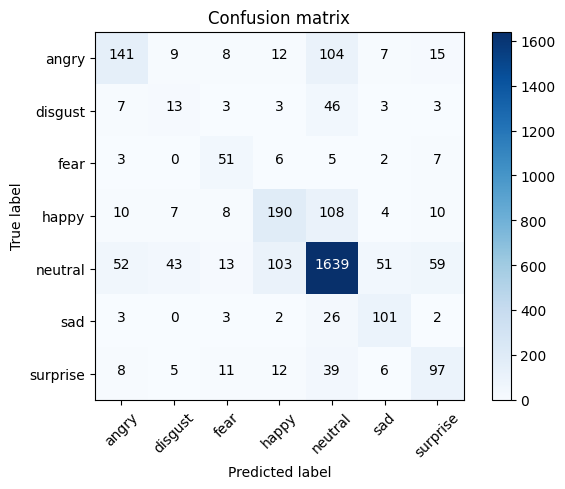

In [68]:
emo_keys = list(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])

plot_confusion_matrix(confusion_matrix(true_labels[1][1], pred_ta_list[0]), classes=emo_keys)

In [45]:
f1[0]

0.7068627450980393

In [239]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

mlp_classifier_ta = MLPClassifier(activation='relu', solver='adam', batch_size=1024, learning_rate='adaptive',alpha= 0.01, hidden_layer_sizes= (1000, 500), learning_rate_init= 0.001,
                               power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001,
                               verbose=False, warm_start=True, momentum=0.8, nesterovs_momentum=True,
                               early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                               epsilon=1e-08)

mlp_classifier_tab = MLPClassifier(activation='relu', solver='adam', batch_size=1024, learning_rate='adaptive',alpha= 0.01, hidden_layer_sizes= (1000, 500), learning_rate_init= 0.001,
                               power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001,
                               verbose=False, warm_start=True, momentum=0.8, nesterovs_momentum=True,
                               early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                               epsilon=1e-08)

mlp_pipeline_ta = make_pipeline(StandardScaler(), mlp_classifier_ta)
mlp_pipeline_tab = make_pipeline(StandardScaler(), mlp_classifier_tab)

In [240]:
# fitting added here
for i in range(5):
  mlp_pipeline_ta.fit(ta_fusion_train[i], true_labels[i][0])

mlp_pipeline_ta.steps[1][1].dropout = 0.2

In [241]:
for i in range(5):
  mlp_pipeline_tab.fit(tab_fusion_train[i], true_labels[i][0])

mlp_pipeline_tab.steps[1][1].dropout = 0.2

In [49]:
import itertools
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    #print(pred)
    pred = [id_to_emotion[num] for num in pred]
    #print(y_test,pred)
    #one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
    print('Test Set Accuracy =  {0:.4f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.4f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.4f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.4f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys)

## early-fusion 결과 (text,wav)

In [264]:
acc = []
f1 = []
pred_ta_list = []

for i in range(5):
  mlp_pipeline_ta.fit(ta_fusion_train[i], true_labels[i][0])
  pred_probs = mlp_pipeline_ta.predict_proba(ta_fusion_test_scaled[i])
  pred = np.argmax(pred_probs, axis=-1)
  pred = [id_to_emotion[num] for num in pred]
  pred_ta_list.append(pred)
  acc.append(accuracy_score(true_labels[i][1], pred))
  f1.append(f1_score(true_labels[i][1], pred, average='micro'))

In [243]:
acc_mean = np.mean(acc)
acc_mean

0.7517994047351969

In [244]:
f1_mean = np.mean(f1)
f1_mean

0.7517994047351969

## early-fusion 결과 (text, wav, signal)

In [245]:
acc_tab = []
f1_tab = []
pred_tab_list = []

for i in range(5):
  mlp_pipeline_tab.fit(tab_fusion_train[i], true_labels[i][0])
  pred_probs_tab = mlp_pipeline_tab.predict_proba(tab_fusion_test_scaled[i])
  pred_tab = np.argmax(pred_probs_tab, axis=-1)
  pred_tab_list.append(pred_tab)
  pred_tab = [id_to_emotion[num] for num in pred_tab]
  acc_tab.append(accuracy_score(true_labels[i][1], pred_tab))
  f1_tab.append(f1_score(true_labels[i][1], pred_tab, average='micro'))

In [246]:
acc_mean_tab = np.mean(acc_tab)
acc_mean_tab

0.7473539988077611

In [247]:
f1_mean_tab = np.mean(f1_tab)
f1_mean_tab

0.7473539988077611

In [ ]:
data = []

for i in range(5):
  temp = pd.read_pickle(f'/content/drive/MyDrive/Colab Notebooks/2023 휴먼이해 공모전/데이터/wav/late/late{i+1}.pkl')
  data.append(temp)

datas = reduce(lambda x,y: pd.concat([x, y], axis=0), data)

In [ ]:
datas['Emotion'].value_counts()

neutral     9800
happy       1684
angry       1484
surprise     891
sad          683
disgust      389
fear         367
Name: Emotion, dtype: int64

##Early fusion confusion matrix 그리기


In [255]:
test_true = []
for tl in true_labels:
  test_true.append(tl[1])

In [257]:
cm_list=[]

In [258]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    cm_list.append(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    #print(pred)
    pred = [id_to_emotion[num] for num in pred]
    print(y_test,pred)
    #one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
    print('Test Set Accuracy =  {0:.4f}'.format(accuracy_score(true_labels[i][1], pred)))
    print('Test Set F-score =  {0:.4f}'.format(f1_score(true_labels[i][1], pred, average='macro')))
    print('Test Set Precision =  {0:.4f}'.format(precision_score(true_labels[i][1], pred, average='macro')))
    print('Test Set Recall =  {0:.4f}'.format(recall_score(true_labels[i][1], pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(true_labels[i][1], pred), classes=emo_keys)

In [263]:
true_labels[0][1]

0          fear
1          fear
2          fear
3          fear
4          fear
         ...   
3055    neutral
3056    neutral
3057    neutral
3058    neutral
3059    neutral
Name: Emotion, Length: 3060, dtype: object

In [262]:
pred_ta_list[0]

array([2, 4, 2, ..., 4, 4, 4])

Confusion matrix, without normalization
[[ 157    7    8    6   98    6   15]
 [   9   13    1    5   46    1    3]
 [   1    0   36    2   30    0    4]
 [   2    0    5  180  136    2   12]
 [   6    3    2   34 1899    4   12]
 [   3    0    1    6   82   42    2]
 [  10    2    5   21   81    2   57]]


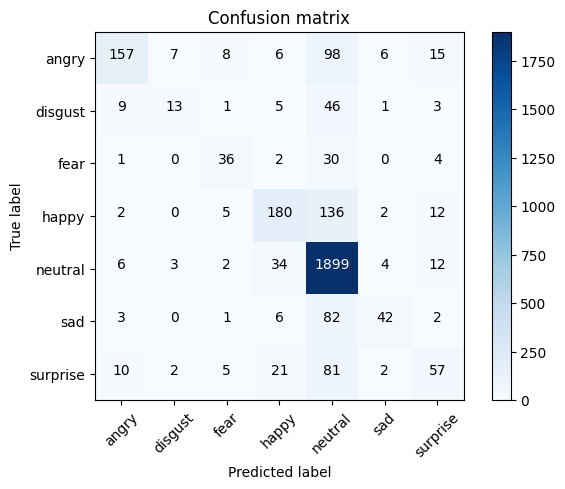

In [269]:
emo_keys = list(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])

plot_confusion_matrix(confusion_matrix(true_labels[4][1], pred_ta_list[4]), classes=emo_keys)

In [270]:
import numpy as np

# 다섯 개의 confusion matrix가 각각 cm1, cm2, cm3, cm4, cm5에 저장되어 있다고 가정합니다.
total_cm = np.zeros(cm_list[0].shape)  # 모든 원소가 0인 confusion matrix를 생성합니다.
print(total_cm)
# 다섯 개의 confusion matrix를 합산합니다.
for cm in cm_list:
    print(total_cm)
    total_cm += cm

# 총 원소 수를 5로 나누어 평균을 구합니다.
avg_cm = total_cm / 5

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[ 162.    7.    4.   10.   93.    8.   13.]
 [   8.   27.    2.    4.   32.    2.    3.]
 [   4.    3.   39.    5.   12.    2.    9.]
 [   3.    4.    5.  215.   94.    3.   13.]
 [  89.   54.   13.   89. 1580.   55.   80.]
 [   0.    2.    0.    3.   24.  101.    6.]
 [   9.    2.    6.   10.   36.    2.  113.]]
[[3.120e+02 1.100e+01 9.000e+00 2.200e+01 1.970e+02 1.300e+01 2.900e+01]
 [1.900e+01 4.000e+01 3.000e+00 7.000e+00 7.800e+01 5.000e+00 4.000e+00]
 [1.000e+01 3.000e+00 7.400e+01 1.100e+01 2.300e+01 5.000e+00 2.200e+01]
 [1.300e+01 5.000e+00 9.000e+00 4.160e+02 1.980e+02 9.000e+00 2.400e+01]
 [1.530e+02 8.000e+01 2.400e+01 2.050e+02 3.242e+03 1.

Text(0.5, -11.79847576553947, 'Predicted label')

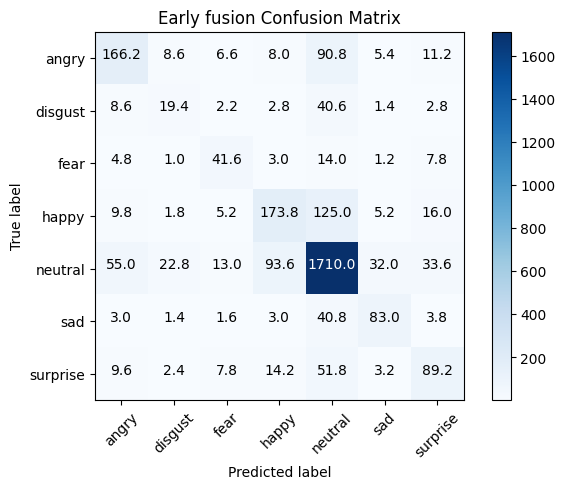

In [273]:
plt.imshow(avg_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Early fusion Confusion Matrix")
tick_marks = np.arange(len(emo_keys))
plt.xticks(tick_marks, emo_keys, rotation=45)
plt.yticks(tick_marks, emo_keys)
thresh = avg_cm.max() / 2.
for i, j in itertools.product(range(avg_cm.shape[0]), range(avg_cm.shape[1])):
    plt.text(j, i, avg_cm[i, j],
              horizontalalignment="center",
              color="white" if avg_cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')